In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [ ]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d austinreese/craigslist-carstrucks-data

 98% 261M/267M [00:03<00:00, 60.1MB/s]
100% 267M/267M [00:04<00:00, 69.4MB/s]


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  craigslist-carstrucks-data.zip
  inflating: vehicles.csv            


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('vehicles.csv')

In [ ]:
df.head(5)

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,NaN,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,NaN,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [ ]:
df.isnull().count()

Unnamed: 0      458213
id              458213
url             458213
region          458213
region_url      458213
price           458213
year            458213
manufacturer    458213
model           458213
condition       458213
cylinders       458213
fuel            458213
odometer        458213
title_status    458213
transmission    458213
VIN             458213
drive           458213
size            458213
type            458213
paint_color     458213
image_url       458213
description     458213
state           458213
lat             458213
long            458213
posting_date    458213
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458213 non-null  int64  
 1   id            458213 non-null  int64  
 2   url           458213 non-null  object 
 3   region        458213 non-null  object 
 4   region_url    458213 non-null  object 
 5   price         458213 non-null  int64  
 6   year          457163 non-null  float64
 7   manufacturer  439993 non-null  object 
 8   model         453367 non-null  object 
 9   condition     265273 non-null  object 
 10  cylinders     287073 non-null  object 
 11  fuel          454976 non-null  object 
 12  odometer      402910 non-null  float64
 13  title_status  455636 non-null  object 
 14  transmission  455771 non-null  object 
 15  VIN           270664 non-null  object 
 16  drive         324025 non-null  object 
 17  size          136865 non-null  object 
 18  type

In [ ]:
#Adding a new column - 'car_age'
import datetime
current_time = datetime.datetime.now()
#current_time.year

df['car_age'] = current_time.year - df['year']

In [ ]:
#making price the last column

df= df.reindex(columns=['id', 'url', 'region', 'region_url', 'year','car_age', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long','posting_date','price'])

In [ ]:
#Dropping the irrelevant columns
df.train=df.copy()#making a copy
df.train=df.train.drop(columns=['url','region_url','vin','image_url','description','county','posting_date'])
df.train

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,id,region,year,car_age,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,price
0,7240372487,auburn,2010.0,10.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,NaN,other,NaN,al,32.590000,-85.480000,35990
1,7240309422,auburn,2014.0,6.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,NaN,sedan,NaN,al,32.547500,-85.468200,7500
2,7240224296,auburn,2006.0,14.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,SUV,blue,al,32.616807,-85.464149,4900
3,7240103965,auburn,1974.0,46.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,full-size,pickup,blue,al,32.861600,-85.216100,2000
4,7239983776,auburn,2005.0,15.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,al,32.547500,-85.468200,19500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458208,7240959076,wausau,2014.0,6.0,cadillac,srx,excellent,6 cylinders,gas,83790.0,clean,automatic,4wd,mid-size,SUV,silver,wi,44.408867,-89.881210,14995
458209,7240954682,wausau,2018.0,2.0,hyundai,tucson,excellent,4 cylinders,gas,31888.0,clean,automatic,4wd,mid-size,SUV,white,wi,44.408867,-89.882240,17895
458210,7240645700,wyoming,2014.0,6.0,cadillac,cts coupe awd,excellent,6 cylinders,gas,53000.0,clean,automatic,4wd,mid-size,coupe,black,wy,44.784900,-106.964800,17900
458211,7240600465,wyoming,2008.0,12.0,jeep,grand cherokee,good,8 cylinders,gas,164000.0,clean,automatic,4wd,mid-size,SUV,white,wy,44.773500,-106.939600,1300


In [ ]:
df.train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            458213 non-null  int64  
 1   region        458213 non-null  object 
 2   year          457163 non-null  float64
 3   car_age       457163 non-null  float64
 4   manufacturer  439993 non-null  object 
 5   model         453367 non-null  object 
 6   condition     265273 non-null  object 
 7   cylinders     287073 non-null  object 
 8   fuel          454976 non-null  object 
 9   odometer      402910 non-null  float64
 10  title_status  455636 non-null  object 
 11  transmission  455771 non-null  object 
 12  drive         324025 non-null  object 
 13  size          136865 non-null  object 
 14  type          345475 non-null  object 
 15  paint_color   317370 non-null  object 
 16  state         458213 non-null  object 
 17  lat           450765 non-null  float64
 18  long

In [ ]:
#separating the numerical variable from categorical variable 

cat_cols=['region','manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive','size','type','paint_color','state']

num_col=['year','odometer','car_age','lat','long']

In [ ]:
import gc
gc.collect()

137

In [ ]:
#Importing relevant libraries
from tqdm import tqdm
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
check_imputer=df.train.copy()#making a copy
check_imputer=check_imputer.drop(columns=['id'])#droping the 'id' column

#LabelEncoding
encoder=preprocessing.LabelEncoder()

#the function to label the categorical columns ignoring null values 
def encode(data):
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    impute_ordinal = encoder.fit_transform(impute_reshape)#encode date
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)#Assigning back the encoded values to the non-null values
    return data

#loop to label each column or categorical values into numberic
for i in tqdm(range(len(cat_cols))):
    encode(check_imputer[cat_cols[i]])

  0%|          | 0/13 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
100%|██████████| 13/13 [00:01<00:00,  7.24it/s]


In [ ]:
gc.collect()

0

In [ ]:
check_imputer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        458213 non-null  int64  
 1   year          457163 non-null  float64
 2   car_age       457163 non-null  float64
 3   manufacturer  439993 non-null  object 
 4   model         453367 non-null  object 
 5   condition     265273 non-null  object 
 6   cylinders     287073 non-null  object 
 7   fuel          454976 non-null  object 
 8   odometer      402910 non-null  float64
 9   title_status  455636 non-null  object 
 10  transmission  455771 non-null  object 
 11  drive         324025 non-null  object 
 12  size          136865 non-null  object 
 13  type          345475 non-null  object 
 14  paint_color   317370 non-null  object 
 15  state         458213 non-null  int64  
 16  lat           450765 non-null  float64
 17  long          450765 non-null  float64
 18  pric

In [ ]:
br_estimator = ExtraTreesRegressor() #base estimator
N_SPLITS = 6  #cross-validation splitting strategy

score_simple_imputer = pd.DataFrame() #dataframe to store error of imputer
#computing MSE for mean and median
for strategy in ('mean', 'median'):
    X=check_imputer.iloc[:,:-1]
        #y=check_imputer.iloc[:,-1:].values.ravel()
    y = np.ravel(check_imputer.iloc[:,-1:])
    estimator = make_pipeline(
        SimpleImputer(missing_values=np.nan, strategy=strategy),
        br_estimator
    )
    score_simple_imputer[strategy] = cross_val_score(
        estimator, X, y, scoring='neg_mean_squared_error',
        cv=N_SPLITS
    )

In [ ]:
# Estimate the score on the entire dataset by filling missing values by 4 different iterative imputer

#estimators for IterativeImputer
estimators = [
    ExtraTreesRegressor(n_estimators=10, random_state=0),
    DecisionTreeRegressor(max_features='sqrt', random_state=0),
    BayesianRidge(),
    KNeighborsRegressor(n_neighbors=15)
]
score_iterative_imputer = pd.DataFrame()
for esti in estimators:
        print("Estimating",esti.__class__.__name__)
        imputer = IterativeImputer(esti)
        df_new=check_imputer.copy()
        for col in check_imputer.columns:
            #col=check_imputer.columns[i]
            impute_data=imputer.fit_transform(df_new[col].values.reshape(-1,1))
            impute_data=impute_data.astype('int64')
            impute_data = pd.DataFrame(np.ravel(impute_data))
            df_new[col]=impute_data
        X=df_new.iloc[:,:-1]
        #y=check_imputer.iloc[:,-1:].values.ravel()
        y = np.ravel(df_new.iloc[:,-1:])
        score_iterative_imputer[esti.__class__.__name__] = cross_val_score(esti,X,y,scoring='neg_mean_squared_error',cv=6)

Estimating ExtraTreesRegressor
Estimating DecisionTreeRegressor
Estimating BayesianRidge
Estimating KNeighborsRegressor


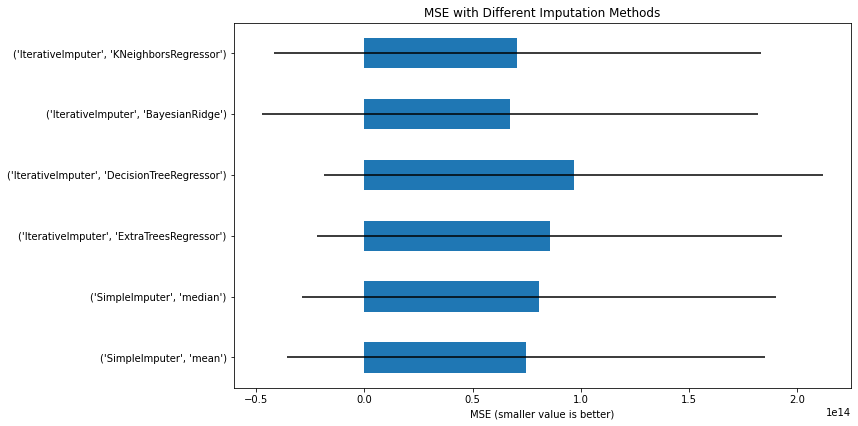

In [ ]:

#ploting the graphs of scores each method
scores = pd.concat(
    [score_simple_imputer, score_iterative_imputer],
    keys=['SimpleImputer', 'IterativeImputer'], axis=1
)
fig, ax = plt.subplots(figsize=(12, 6))
means = -scores.mean()
errors = scores.std()
means.plot.barh(xerr=errors, ax=ax)
ax.set_title('MSE with Different Imputation Methods')
ax.set_xlabel('MSE (smaller value is better)')
ax.set_yticks(np.arange(means.shape[0]))
ax.set_yticklabels(means.index.tolist())
plt.tight_layout(pad=1)
plt.savefig('different-imputations-method',dpi=None)
plt.show()

In [ ]:
df.train.isnull().sum()[num_col]

year         1050
odometer    55303
car_age      1050
lat          7448
long         7448
dtype: int64

In [ ]:
data_num=df.train[num_col]
imputer_num=IterativeImputer(estimators[2]) #estimators[2] = BayesianRidge
impute_data=imputer_num.fit_transform(data_num)
df.train[num_col]=impute_data

In [ ]:
#Missing values of the num_col after filling
df.train.isnull().sum()[num_col]

year        0
odometer    0
car_age     0
lat         0
long        0
dtype: int64

In [ ]:
#Missing values of the cat_cols before filling
df.train.isnull().sum()[cat_cols]

region               0
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
title_status      2577
transmission      2442
drive           134188
size            321348
type            112738
paint_color     140843
state                0
dtype: int64

In [ ]:
data_cat=df.train[cat_cols]
encoder=preprocessing.LabelEncoder()

#create a for loop to iterate through each column in the data
for columns in cat_cols:
    encode(data_cat[columns])
    imputer = IterativeImputer(BayesianRidge())
    impute_data=imputer.fit_transform(data_cat[columns].values.reshape(-1, 1))
    impute_data=impute_data.astype('int64')
    impute_data = pd.DataFrame(impute_data)
    impute_data =encoder.inverse_transform(impute_data.values.reshape(-1, 1))
    data_cat[columns]=impute_data
df.train[cat_cols]=data_cat

In [ ]:
df.train.isnull().sum()[cat_cols]

region          0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [ ]:
df.train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            458213 non-null  int64  
 1   region        458213 non-null  object 
 2   year          458213 non-null  float64
 3   car_age       458213 non-null  float64
 4   manufacturer  458213 non-null  object 
 5   model         458213 non-null  object 
 6   condition     458213 non-null  object 
 7   cylinders     458213 non-null  object 
 8   fuel          458213 non-null  object 
 9   odometer      458213 non-null  float64
 10  title_status  458213 non-null  object 
 11  transmission  458213 non-null  object 
 12  drive         458213 non-null  object 
 13  size          458213 non-null  object 
 14  type          458213 non-null  object 
 15  paint_color   458213 non-null  object 
 16  state         458213 non-null  object 
 17  lat           458213 non-null  float64
 18  long

In [ ]:
df.train.to_csv('improved-vehiclesData.csv',index=False)

In [ ]:
df=pd.read_csv('improved-vehiclesData.csv')

In [ ]:
df

,id,region,year,car_age,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,price
0,7240372487,auburn,2010.0,10.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,full-size,other,grey,al,32.590000,-85.480000,35990
1,7240309422,auburn,2014.0,6.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,full-size,sedan,grey,al,32.547500,-85.468200,7500
2,7240224296,auburn,2006.0,14.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,4wd,full-size,SUV,blue,al,32.616807,-85.464149,4900
3,7240103965,auburn,1974.0,46.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,full-size,pickup,blue,al,32.861600,-85.216100,2000
4,7239983776,auburn,2005.0,15.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,al,32.547500,-85.468200,19500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458208,7240959076,wausau,2014.0,6.0,cadillac,srx,excellent,6 cylinders,gas,83790.0,clean,automatic,4wd,mid-size,SUV,silver,wi,44.408867,-89.881210,14995
458209,7240954682,wausau,2018.0,2.0,hyundai,tucson,excellent,4 cylinders,gas,31888.0,clean,automatic,4wd,mid-size,SUV,white,wi,44.408867,-89.882240,17895
458210,7240645700,wyoming,2014.0,6.0,cadillac,cts coupe awd,excellent,6 cylinders,gas,53000.0,clean,automatic,4wd,mid-size,coupe,black,wy,44.784900,-106.964800,17900
458211,7240600465,wyoming,2008.0,12.0,jeep,grand cherokee,good,8 cylinders,gas,164000.0,clean,automatic,4wd,mid-size,SUV,white,wy,44.773500,-106.939600,1300


In [ ]:
def outliers(arr,col):
    x=sorted(arr[col].values.ravel())
    L_25=25/100*(len(x)+1) #L_p where p=25%
    i_p=int(str(L_25).split(".")[0])
    f_p=int(str(L_25).split(".")[1])
    q1=x[i_p]+f_p*(x[i_p+1]-x[i_p])
    
    L_75=75/100*(len(x)+1) #L_p where p=75%
    i_p=int(str(L_75).split(".")[0])
    f_p=int(str(L_75).split(".")[1])
    q3=x[i_p]+f_p*(x[i_p+1]-x[i_p])
    
    #q1,q3=(arr[col].quantile([0.25,0.75]))
    
    IQR=q3-q1
    x1=q1-1.5*IQR
    x2=q3+1.5*IQR
    return (x1,x2)

In [ ]:
def min_max_price(df):
    r=[]
    q1,q3=(df['logprice'].quantile([0.25,0.75]))
    r.append(q1-1.5*(q3-q1))
    r.append(q3+1.5*(q3-q1))
    return (r)
df['logprice'] = np.log(df['price'])
x=df['logprice']
price_range=list(range(0,int(max(df['logprice']))+1))
red_square = dict(markerfacecolor='g', marker='s')

In [ ]:
#removing outliers 
out=np.array(['logprice','odometer','year'])
for col in out:
    o1,o2=outliers(df,col)
    df=df[(df[col]>=o1) & (df[col]<=o2)]
    print('IQR of',col,'=',o1,o2)
df=df[df['price']!=0]
df.drop('logprice',axis=1,inplace=True)



IQR of logprice = 6.851760089510943 11.992553066505035
IQR of odometer = -82000.0 262000.0
IQR of year = 1996.0 2028.0


In [ ]:
#defining numerical and categorical values
numerical=['year','odometer','long','lat']
categorical=['region','manufacturer','model','condition','cylinders','fuel','state','title_status','transmission','drive','size','type','paint_color']

In [ ]:
convert=preprocessing.LabelEncoder()
df[categorical]=df[categorical].apply(convert.fit_transform)

In [ ]:
normalized = StandardScaler()
df['price'] = np.log(df['price'])
df['year'] = normalized.fit_transform(np.array(df['year']).reshape(-1,1))
df['model'] = normalized.fit_transform(np.array(df['model']).reshape(-1,1))
df['odometer'] = normalized.fit_transform(np.array(df['odometer']).reshape(-1,1))


#The target variable
q1,q3=(df['price'].quantile([0.25,0.75]))
o1=q1-1.5*(q3-q1)
o2=q3+1.5*(q3-q1)
df=df[(df.price>=o1) & (df.price<=o2)]

df['region'] = normalized.fit_transform(np.array(df['region']).reshape(-1,1))
df['lat'] = normalized.fit_transform(np.array(df['lat']).reshape(-1,1))
df['long'] = normalized.fit_transform(np.array(df['long']).reshape(-1,1))

In [ ]:
df

,id,region,year,car_age,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,price
0,7240372487,-1.500430,-0.356342,10.0,7,-0.748504,2,6,2,-1.086500,0,2,2,1,7,5,1,-1.020745,0.482074,2.350517
1,7240309422,-1.500430,0.404419,6.0,18,1.153801,0,3,2,-0.008022,0,0,1,1,9,5,1,-1.027998,0.482738,2.188594
2,7240224296,-1.500430,-1.117104,14.0,4,1.594539,2,5,2,-0.124167,0,0,0,1,0,1,1,-1.016171,0.482966,2.139712
4,7239983776,-1.500430,-1.307294,15.0,13,-0.167661,0,6,0,0.388933,1,0,0,1,8,1,1,-1.027998,0.482738,2.290327
5,7239776805,-1.500430,0.784800,4.0,40,1.284896,2,5,2,-1.076789,0,2,0,1,8,8,1,-1.020745,0.482074,2.331677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458207,7240964712,1.600476,0.974990,3.0,3,-1.242100,1,4,2,0.127900,0,0,0,1,6,5,48,1.070284,0.140279,2.292634
458208,7240959076,1.600476,0.404419,6.0,6,1.219424,0,5,2,-0.181867,0,0,0,2,0,9,48,0.996165,0.234262,2.263373
458209,7240954682,1.600476,1.165180,2.0,18,1.451580,0,3,2,-1.101634,0,0,0,2,0,10,48,0.996165,0.234204,2.281594
458210,7240645700,1.727216,0.404419,6.0,6,-0.679728,0,5,2,-0.727504,0,0,0,2,3,0,50,1.060336,-0.727636,2.281623


In [ ]:
def trainingDataset(df,n):
    X = df.iloc[:,n]
    y = df.iloc[:,-1:].values.T
    y=y[0]
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9,test_size=0.1,random_state=0)
    return (x_train,x_test,y_train,y_test)

X_train,X_test,y_train,y_test=trainingDataset(df,list(range(len(list(df.columns))-1)))

In [ ]:
#some of models will predict neg values so this function will remove that values

def remove_neg(y_test,y_pred):
    ind=[index for index in range(len(y_pred)) if(y_pred[index]>0)]
    y_pred=y_pred[ind]
    y_test=y_test[ind]
    y_pred[y_pred<0]
    return (y_test,y_pred)

#function for evaluation of model
def result(y_test,y_pred):
    r=[]
    r.append(mean_squared_log_error(y_test, y_pred))
    r.append(np.sqrt(r[0]))
    r.append(r2_score(y_test,y_pred))
    r.append(round(r2_score(y_test,y_pred)*100,4))
    return (r)



##RandomForest

In [ ]:
param = RandomForestRegressor(n_estimators=300, min_samples_split=2, 
                                 min_samples_leaf=1, max_features='auto', random_state = 1 )
param.fit(X_train, y_train)
y_pred = param.predict(X_test)

In [ ]:
gc.collect()

263

In [ ]:
y_pred

array([2.1122    , 2.36293088, 2.17287829, ..., 2.06317152, 2.15543751,
       2.2376069 ])

##Result of the RandomForest Model

In [ ]:
random_result =result(y_test,y_pred)
print("MSLE : {}".format(random_result[0]))
print("Root MSLE : {}".format(random_result[1]))
print("R2 Score : {} or {}%".format(random_result[2],random_result[3]))
accu['RandomForest Regressor']= random_result



MSLE : 8.318697856840513e-05
Root MSLE : 0.009120689588425051
R2 Score : 0.8952415754775401 or 89.5242%


##XGBOOST

In [ ]:
xgboost = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
                max_depth = 24, alpha = 5, n_estimators = 200)
xgboost.fit(X_train,y_train)
y_preds = xgboost.predict(X_test)

##Result of the XGBOOST Model

In [ ]:
y_test_1,y_pred_1=remove_neg(y_test,y_preds)

xgboost_result=result(y_test_1,y_pred_1)
print("MSLE : {}".format(xgboost_result[0]))
print("Root MSLE : {}".format(xgboost_result[1]))
print("R2 Score : {} or {}%".format(xgboost_result[2],xgboost_result[3]))

MSLE : 8.095324665836662e-05
Root MSLE : 0.008997402217216179
R2 Score : 0.8979684152562684 or 89.7968%
